# 密度聚类（Density-based clustering）

又称基于密度的聚类，从样本密度的角度来考察样本之间的可连接性，并基于可连接性不断扩展聚类簇以获得最终的聚类结果。

DBSCAN（Density-based Spatial Clustering of Applications with Noise）是一种著名的聚类算法，它基于一组“邻域”（neighborhood）参数来刻画样本分布的紧密程度。

DBSCAN中关于“簇”的定义：由密度可达关系导出的最大密度相连样本集合。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import copy
import random
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

#### 数据获取与处理

In [2]:
dataSet = pd.read_excel(r'D:\a学业信计\a研究生\数据集\西瓜书\watermelon4.0.xlsx')
data = dataSet.values
labels = dataSet.columns.values
indexs = dataSet.index.values
data = data.tolist()

#### 邻域参数设置

In [3]:
epsilon = 0.11
MinPts = 5

#### 函数

In [4]:
def EuclideanMetric(x, y):
    #定义距离函数，计算欧氏距离
    return np.sqrt(sum(pow(np.array(x) - np.array(y), 2)))

In [5]:
def neighbours(x):
    C_current = []
    #C_current.append(x)
    for j in range(len(indexs)):
        if EuclideanMetric(x, data[j]) <= epsilon:
            C_current.append(data[j])
    return C_current

In [6]:
#根据当前划分结果绘制聚类图象
def show_now_kmeans(C, C_density):
    colors = ['b', 'y', 'g', 'c', 'k', 'orange', 'mistyrose', 'gold']
    plt.figure()
    C_density = np.array(C_density)
    plt.scatter(C_density[:,0], C_density[:,1], marker = 'o', s = 50, facecolor = 'none', edgecolors = 'r', label = '核心对象')
    for i in range(k):
        plt.plot(np.array(C[i])[:,0], np.array(C[i])[:,1], colors[i] + '.', label = '类别' + str(i + 1))
    
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

#### 初始化核心对象

In [7]:
C_points = []
for i in range(len(indexs)):
    if len(neighbours(data[i])) >= MinPts:
        C_points.append(data[i])
        
    '''C_current = []
    C_current.append(data[i])
    for j in range(len(index)):
        if EuclideanMetric(data[i], data[j]) <= epsilon:
            C_current.append(data[j])
    if len(C_current) >= MinPts + 1:#除去该点本身
        C_points.append(data[i])
        #C.append(C_current)'''
    
C_points_copy = copy.deepcopy(C_points)   


In [8]:
len(C_points)

13

#### 初始化聚类簇数

In [9]:
k = 0

#### 初始化未访问样本集合

In [10]:
data_remain = copy.deepcopy(data)

#### while循环进行分类

In [11]:
C = []
k = 0
while len(C_points) > 0:
    
    data_remain_old = copy.deepcopy(data_remain)#记录当前未访问样本集合
    Q = []#初始化队列
    index = random.randint(0, len(C_points) - 1)
    Q.append(C_points[index])
    data_remain = list(filter(lambda x: x not in Q, data_remain))
    
    while len(Q) > 0:
        q = Q[0]
        Q.remove(q)#取出第一个元素
        if len(neighbours(q)) >= MinPts:
            delta = [x for x in data_remain if x in neighbours(q)]#包含q及其领域内元素
            Q.extend(delta)
            data_remain = list(filter(lambda x: x not in delta, data_remain))
            #print(len(data_remain))
    
    k += 1
    C_k = list(filter(lambda x: x not in data_remain, data_remain_old))
    C.append(C_k)
    C_points = list(filter(lambda x: x not in C_k, C_points))
    #print(C_points)
    #print(len(C))

#### 绘制分类结果

Text(0.5, 1.0, '分类结果')

<Figure size 432x288 with 0 Axes>

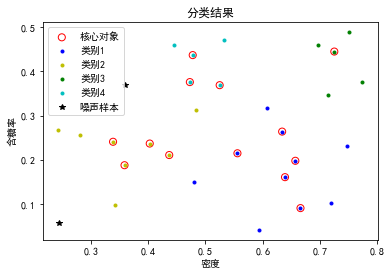

In [12]:
plt.figure()
show_now_kmeans(C, C_points_copy)
plt.plot(np.array(data_remain)[:,0], np.array(data_remain)[:,1], 'k*' , label = '噪声样本')
plt.legend()
plt.title('分类结果')

### 啊啊啊啊啊！成功地一次编程，和书上的一样耶！

## 使用sklearn实现密度聚类（DBSCAN算法）

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
y_pred = DBSCAN(eps = 0.11, min_samples = 5).fit_predict(data)

In [15]:
y_pred

array([ 3,  0, -1,  1,  1,  3,  3,  0,  0,  1,  3,  2,  1,  0,  1,  0,  0,
        2,  1,  1,  1,  0,  2,  3,  1,  0, -1,  0,  2,  2], dtype=int64)

#### 结果可视化

In [ ]:
show_now_kmeans()

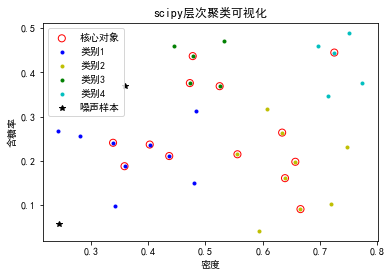

In [22]:
def show_clustered_samples(f):#基于分类后的样本对应标签clustered_indexs向量可视化
    n_clusters = max(f) + 1
    C = []
    C_dark = []
    for i in range(n_clusters):
        C.append([])
    for i in range(len(f)):
        if f[i] != -1:
            C[f[i]].append(data[i])
        else:
            C_dark.append(data[i])
    show_now_kmeans(C,C_points_copy)
    plt.plot(np.array(C_dark)[:,0], np.array(C_dark)[:,1], 'k*', label = '噪声样本')
    return True
show_clustered_samples(y_pred)
plt.title('scipy层次聚类可视化')
plt.legend()